In [108]:
# Import necessary libraries
import yfinance as yf
import warnings
warnings.filterwarnings('ignore') # Suppress warnings for a cleaner output
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')
# List of stock symbols
stocks     = ["AAPL", "MSFT", "INTC", "SPY", "^SPX","^VIX" ,"GDX", "GLD", "JPM","JNJ","KO","BA","PG", "GC=F"]

# Fetch data from 2010-01-01 to now and store in a DataFrame
dataframes = []
for stock in stocks:
    df     = yf.download(stock, start="2010-01-01")[['Close']]
    df.rename(columns={'Close': stock}, inplace=True)
    dataframes.append(df)

# Merge all dataframes on the 'Date' column
data       = pd.concat(dataframes, axis=1)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [109]:
data1 = data.copy()

In [110]:
data.head()

,AAPL,MSFT,INTC,SPY,^SPX,^VIX,GDX,GLD,JPM,JNJ,KO,BA,PG,GC=F
Date,,,,,,,,,,,,,,
2010-01-04,7.643214,30.950001,20.879999,113.330002,1132.989990,20.040001,47.709999,109.800003,42.849998,64.680000,28.520000,56.180000,61.119999,1117.699951
2010-01-05,7.656429,30.959999,20.870001,113.629997,1136.520020,19.350000,48.169998,109.699997,43.680000,63.930000,28.174999,58.020000,61.139999,1118.099976
2010-01-06,7.534643,30.770000,20.799999,113.709999,1137.140015,19.160000,49.340000,111.510002,43.919998,64.449997,28.165001,59.779999,60.849998,1135.900024
2010-01-07,7.520714,30.450001,20.600000,114.190002,1141.689941,19.059999,49.099998,110.820000,44.790001,63.990002,28.094999,62.200001,60.520000,1133.099976
2010-01-08,7.570714,30.660000,20.830000,114.570000,1144.979980,18.129999,49.840000,111.370003,44.680000,64.209999,27.575001,61.599998,60.439999,1138.199951


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3457 entries, 2010-01-04 to 2023-09-27
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3457 non-null   float64
 1   MSFT    3457 non-null   float64
 2   INTC    3457 non-null   float64
 3   SPY     3457 non-null   float64
 4   ^SPX    3457 non-null   float64
 5   ^VIX    3457 non-null   float64
 6   GDX     3457 non-null   float64
 7   GLD     3457 non-null   float64
 8   JPM     3457 non-null   float64
 9   JNJ     3457 non-null   float64
 10  KO      3457 non-null   float64
 11  BA      3457 non-null   float64
 12  PG      3457 non-null   float64
 13  GC=F    3454 non-null   float64
dtypes: float64(14)
memory usage: 405.1 KB


In [112]:
symb= 'AAPL'
data = data[[symb]].dropna()

In [113]:
SMA1=42
SMA2=252

In [114]:
data['SMA1'] = data[symb].rolling(SMA1).mean()

In [115]:
data['SMA2'] = data[symb].rolling(SMA2).mean()

In [116]:
data.tail()

,AAPL,SMA1,SMA2
Date,,,
2023-09-21,173.929993,181.986667,161.361428
2023-09-22,174.789993,181.538334,161.445040
2023-09-25,176.080002,181.099762,161.537659
2023-09-26,171.960007,180.593572,161.623095
2023-09-27,170.429993,179.988810,161.701111


<Axes: xlabel='Date'>

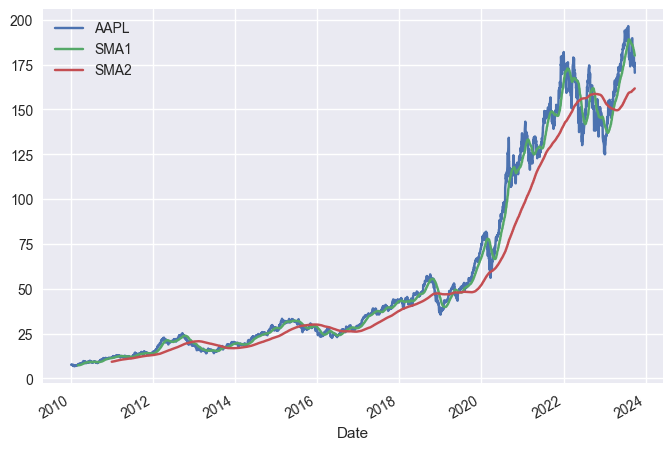

In [117]:
data.plot()

In [118]:
data.dropna(inplace=True)

In [119]:
import numpy as np

In [120]:
data['Position']= np.where(data['SMA1']>data['SMA2'],1,-1)

<Axes: xlabel='Date'>

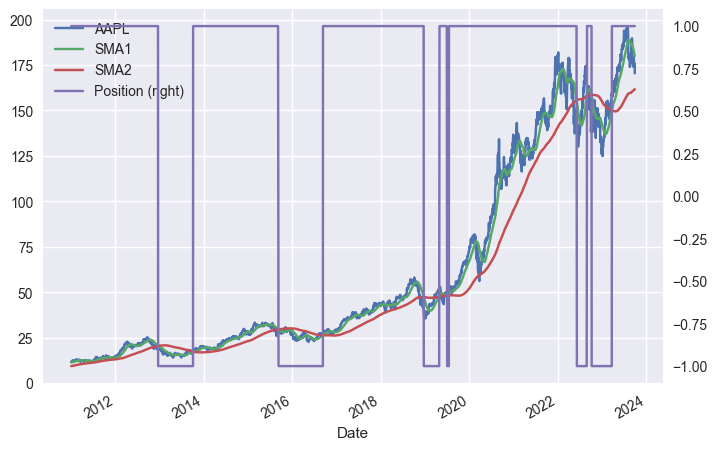

In [121]:
data.plot(secondary_y='Position')

In [122]:
data['Returns'] = np.log(data[symb]/data[symb].shift(1))

In [123]:
data.head()

,AAPL,SMA1,SMA2,Position,Returns
Date,,,,,
2010-12-31,11.520000,11.319609,9.280088,1,NaN
2011-01-03,11.770357,11.336794,9.296465,1,0.021500
2011-01-04,11.831786,11.352517,9.313034,1,0.005205
2011-01-05,11.928571,11.365893,9.330471,1,0.008147
2011-01-06,11.918929,11.380009,9.347924,1,-0.000809


In [124]:
data['Strategy'] = data['Position'].shift(1)*data['Returns']

In [125]:
data.head()

,AAPL,SMA1,SMA2,Position,Returns,Strategy
Date,,,,,,
2010-12-31,11.520000,11.319609,9.280088,1,NaN,NaN
2011-01-03,11.770357,11.336794,9.296465,1,0.021500,0.021500
2011-01-04,11.831786,11.352517,9.313034,1,0.005205,0.005205
2011-01-05,11.928571,11.365893,9.330471,1,0.008147,0.008147
2011-01-06,11.918929,11.380009,9.347924,1,-0.000809,-0.000809


In [126]:
data.dropna(inplace=True)

In [127]:
np.exp(data[['Returns', 'Strategy']].sum())

Returns     14.794270
Strategy     8.503547
dtype: float64

In [128]:
from itertools import product

In [129]:
sma1=range(20,61,4)
sma2=range(180,281,10)

In [130]:
results              = pd.DataFrame()
for SMA1, SMA2 in product(sma1,sma2):
    data1             = pd.DataFrame(data1[symb])

    data1.dropna(inplace=True)
    data1['Returns']  = np.log(data1[symb]/data1[symb].shift(1))
    data1['SMA1']     = data1[symb].rolling(SMA1).mean()
    data1['SMA2']     = data1[symb].rolling(SMA2).mean()

    data1.dropna(inplace=True)
    data1['Position'] = np.where(data1['SMA1']>data1['SMA2'],1,-1)
    data1['Strategy'] = data1['Position'].shift(1)*data1['Returns']

    data1.dropna(inplace=True)

    pref             = np.exp(data1[['Returns','Strategy']].sum())
    df_to_append     = pd.DataFrame({'SMA1': SMA1, 'SMA2': SMA2, 'Returns': pref['Returns'], 'Strategy': pref['Strategy'], 'Out': pref['Strategy']-pref['Returns']}, index=[0])
    results          = pd.concat([results, df_to_append], ignore_index=True)


In [132]:
results.head(10)

,SMA1,SMA2,Returns,Strategy,Out
0,20,180,16.848638,5.103845,-11.744793
1,20,190,14.669658,4.827608,-9.842050
2,20,200,7.530677,3.642525,-3.888152
3,20,210,10.191875,4.489268,-5.702607
4,20,220,8.691924,4.726002,-3.965921
5,20,230,5.945060,3.379534,-2.565526
6,20,240,5.561883,3.418960,-2.142923
7,20,250,6.004227,2.926222,-3.078005
8,20,260,3.902902,1.810872,-2.092030
9,20,270,4.019575,1.538996,-2.480580
